In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from epam.sequences import translate_sequences

In [2]:
pcp_df = pd.read_csv("/Users/matsen/re/epam/_ignore/data/wyatt-10x-1p5m_pcp_2023-10-07.csv")

# drop first column (index)
pcp_df = pcp_df.drop(pcp_df.columns[0], axis=1)

pcp_df

,sample_id,family,parent,child,v_gene,child_is_leaf
0,0,149198,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,IGHV3-33*01,False
1,0,149198,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,IGHV3-33*01,False
2,0,149198,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,CAAGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,IGHV3-33*01,False
3,0,149198,CAAGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,CAAATGCAGATGGTGGAGTCGGGGGGAGGCGTGGTCCAGCCAGGGA...,IGHV3-33*01,True
4,0,149198,CAAGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,CAAGTGCAACTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,IGHV3-33*01,True
...,...,...,...,...,...,...
94624,0,17934,CAGCTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,CAGCTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,IGHV4-39*01,False
94625,0,17934,CAGCTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,CAGCTGCAGCTGCAGGAGTCGGGCCCAGGACTTGTGAAGCCTTCGG...,IGHV4-39*01,True
94626,0,17934,CAGCTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,CAGCTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,IGHV4-39*01,True
94627,0,269306,GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,IGHV3-23*01,True


In [3]:
pcp_df["aa_parent"] = translate_sequences(pcp_df["parent"])
pcp_df["aa_child"] = translate_sequences(pcp_df["child"])

def mutation_vector_of(parent, child):
    return np.array(list(parent)) != np.array(list(child))

def mutation_column_of(col1, col2):
    return [mutation_vector_of(p, c) for p, c in zip(col1, col2)]

pcp_df["nt_mutations"] = mutation_column_of(pcp_df["parent"], pcp_df["child"])
pcp_df["aa_mutations"] = mutation_column_of(pcp_df["aa_parent"], pcp_df["aa_child"])

pcp_df["nt_mutation_count"] = [np.sum(x) for x in pcp_df["nt_mutations"]]
pcp_df["aa_mutation_count"] = [np.sum(x) for x in pcp_df["aa_mutations"]]

pcp_df

,sample_id,family,parent,child,v_gene,child_is_leaf,aa_parent,aa_child,nt_mutations,aa_mutations,nt_mutation_count,aa_mutation_count
0,0,149198,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,IGHV3-33*01,False,QVQLVESGGGVVQPGRSLRLSCAASGFTFSSSGMHWVRQAPGKGLE...,QVQLVESGGGVVQPGRSLRLSCAASGFTFNSSGMHWVRQAPGKGLE...,"[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",3,2
1,0,149198,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,IGHV3-33*01,False,QVQLVESGGGVVQPGRSLRLSCAASGFTFNSSGMHWVRQAPGKGLE...,QVQLVESGGGVVQPGRSLRLSCAASGFTFDSSGMHWVRQAPGKGLE...,"[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",4,3
2,0,149198,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,CAAGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,IGHV3-33*01,False,QVQLVESGGGVVQPGRSLRLSCAASGFTFDSSGMHWVRQAPGKGLE...,QVQLVESGGGVVQPGRSLRLSCATSGFNFDTSGMHWVRQAPGKGLE...,"[False, False, True, False, False, False, Fals...","[False, False, False, False, False, False, Fal...",16,7
3,0,149198,CAAGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,CAAATGCAGATGGTGGAGTCGGGGGGAGGCGTGGTCCAGCCAGGGA...,IGHV3-33*01,True,QVQLVESGGGVVQPGRSLRLSCATSGFNFDTSGMHWVRQAPGKGLE...,QMQMVESGGGVVQPGRSLTLSCATSGFNFETSALHWVRQAPGKGLE...,"[False, False, False, True, False, False, Fals...","[False, True, False, True, False, False, False...",19,9
4,0,149198,CAAGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,CAAGTGCAACTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,IGHV3-33*01,True,QVQLVESGGGVVQPGRSLRLSCATSGFNFDTSGMHWVRQAPGKGLE...,QVQLVESGGGVVQPGRSLRLSCATSGINFDTSGMHWVRQAPGKGLE...,"[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",7,4
...,...,...,...,...,...,...,...,...,...,...,...,...
94624,0,17934,CAGCTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,CAGCTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,IGHV4-39*01,False,QLQLQESGPGLVKPSETLSLTCTVSGGSISSSSYYWGWIRQPPGKG...,QLQLQESGPGLVKPSETLSLTCTVSGGSISSSSYYWGWIRQPPGKG...,"[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",2,1
94625,0,17934,CAGCTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,CAGCTGCAGCTGCAGGAGTCGGGCCCAGGACTTGTGAAGCCTTCGG...,IGHV4-39*01,True,QLQLQESGPGLVKPSETLSLTCTVSGGSISSSSYYWGWIRQPPGKG...,QLQLQESGPGLVKPSETLSLTCTVSGGSISSSSYYWAWIRQPPGKR...,"[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",8,3
94626,0,17934,CAGCTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,CAGCTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,IGHV4-39*01,True,QLQLQESGPGLVKPSETLSLTCTVSGGSISSSSYYWGWIRQPPGKG...,QLQLQESGPGLVKPSETLSLTCTVSGGSISSSSYYWGWIRQPPGKG...,"[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",0,0
94627,0,269306,GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,IGHV3-23*01,True,EVQLLESGGGLVQPGGSLRLSCAASGFTFSSFAMSWVRQAPGKGLE...,EVQLLESGGGLVQPGGSLRLSCAASEFTFSSFAMSWVRQAPGKGLE...,"[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",3,2


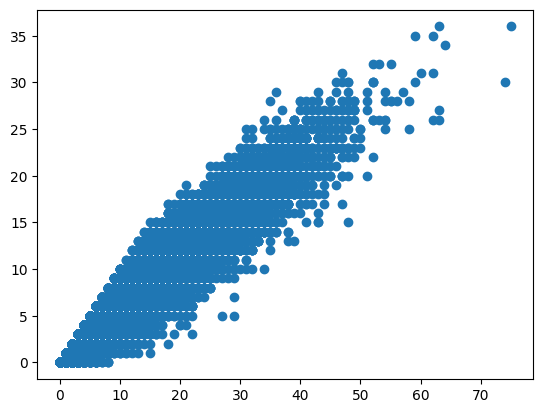

In [4]:
# Make a scatter plot of nt_mutation_count vs aa_mutation_count

import matplotlib.pyplot as plt
plt.scatter(pcp_df["nt_mutation_count"], pcp_df["aa_mutation_count"])

<Axes: >

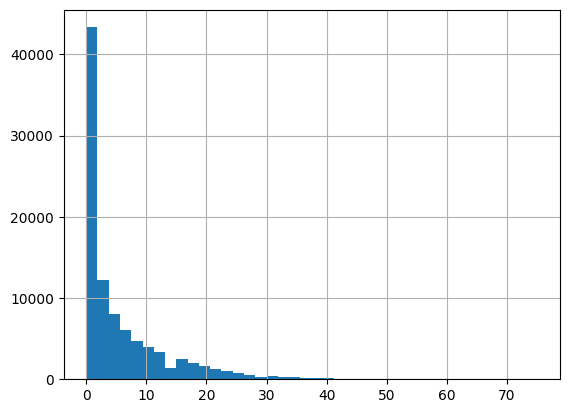

In [5]:
pcp_df["nt_mutation_count"].hist(bins=40)

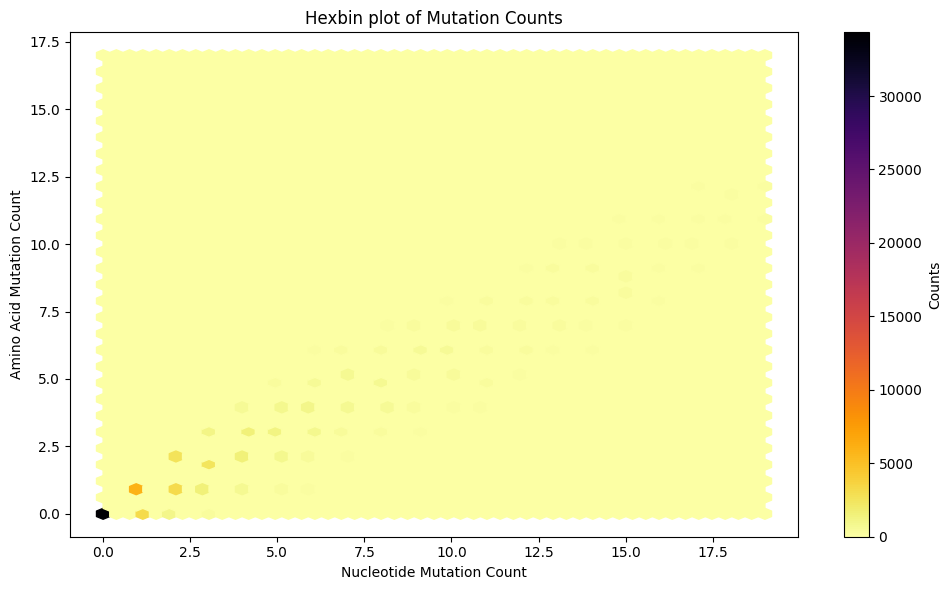

In [6]:
import matplotlib.pyplot as plt

pcp_df_filtered = pcp_df[pcp_df["nt_mutation_count"] < 20]

# Generate the hexbin plot
plt.figure(figsize=(10, 6))
hb = plt.hexbin(pcp_df_filtered["nt_mutation_count"], pcp_df_filtered["aa_mutation_count"], gridsize=50, cmap='inferno_r')

# Add a colorbar to the plot
cb = plt.colorbar(hb)
cb.set_label('Counts')

# Set axis labels and title
plt.xlabel('Nucleotide Mutation Count')
plt.ylabel('Amino Acid Mutation Count')
plt.title('Hexbin plot of Mutation Counts')

plt.tight_layout()
plt.show()


In [7]:
high_mut_df = pcp_df[pcp_df["nt_mutation_count"] > 30]

len(high_mut_df)

1307

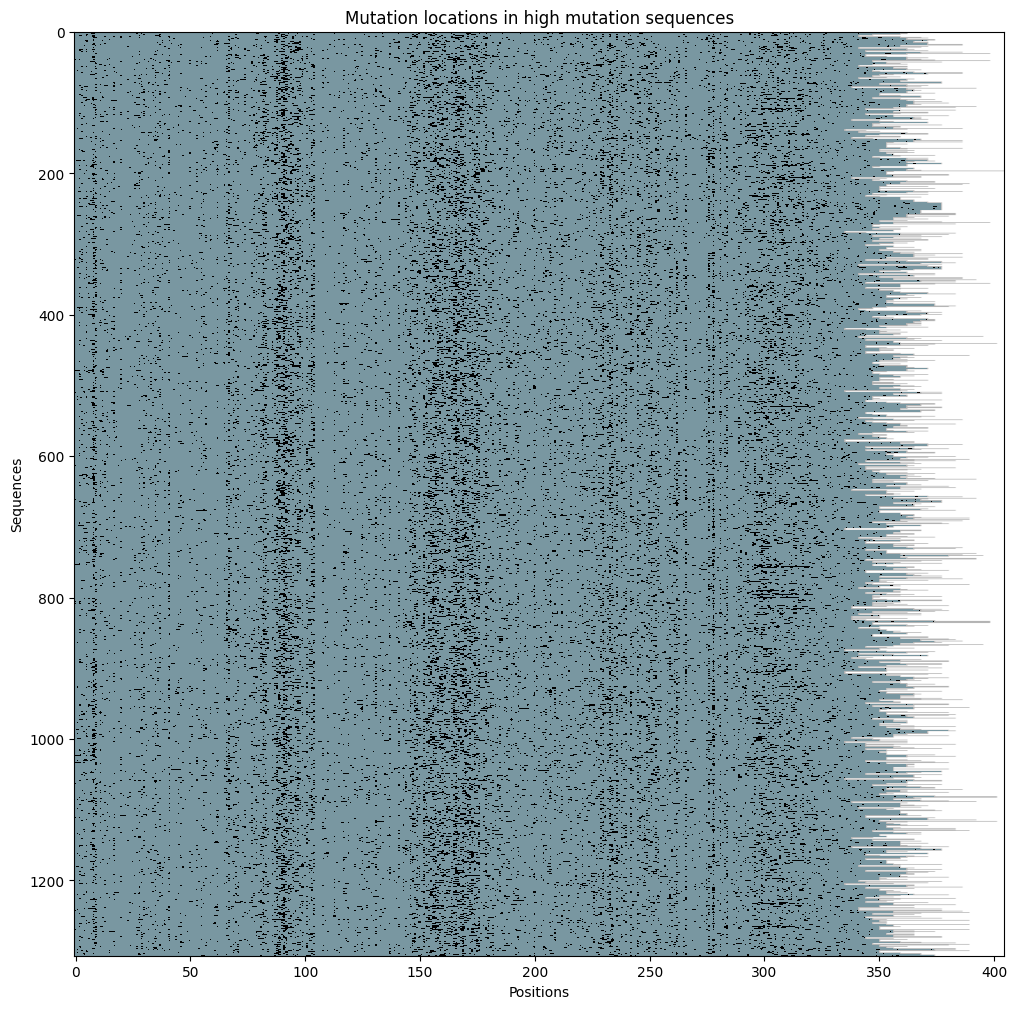

In [8]:
# Find the maximum sequence length
max_len = high_mut_df['nt_mutations'].apply(len).max()

# Initialize a 2D NumPy array with NaNs
arr = np.full((len(high_mut_df), max_len), np.nan)

# Fill in the values
for i, row in enumerate(high_mut_df['nt_mutations']):
    arr[i, :len(row)] = row

plt.figure(figsize=(12, 12))

# Define the colormap: white for NaN, light gray for False, and black for True
cmap = plt.cm.colors.ListedColormap(['lightblue', 'black'])
plt.imshow(arr, cmap=cmap, aspect='auto')

# Use white color for NaNs
plt.imshow(np.isnan(arr), cmap='gray', alpha=0.3, aspect='auto')

plt.title("Mutation locations in high mutation sequences")
plt.xlabel("Positions")
plt.ylabel("Sequences")
plt.show()


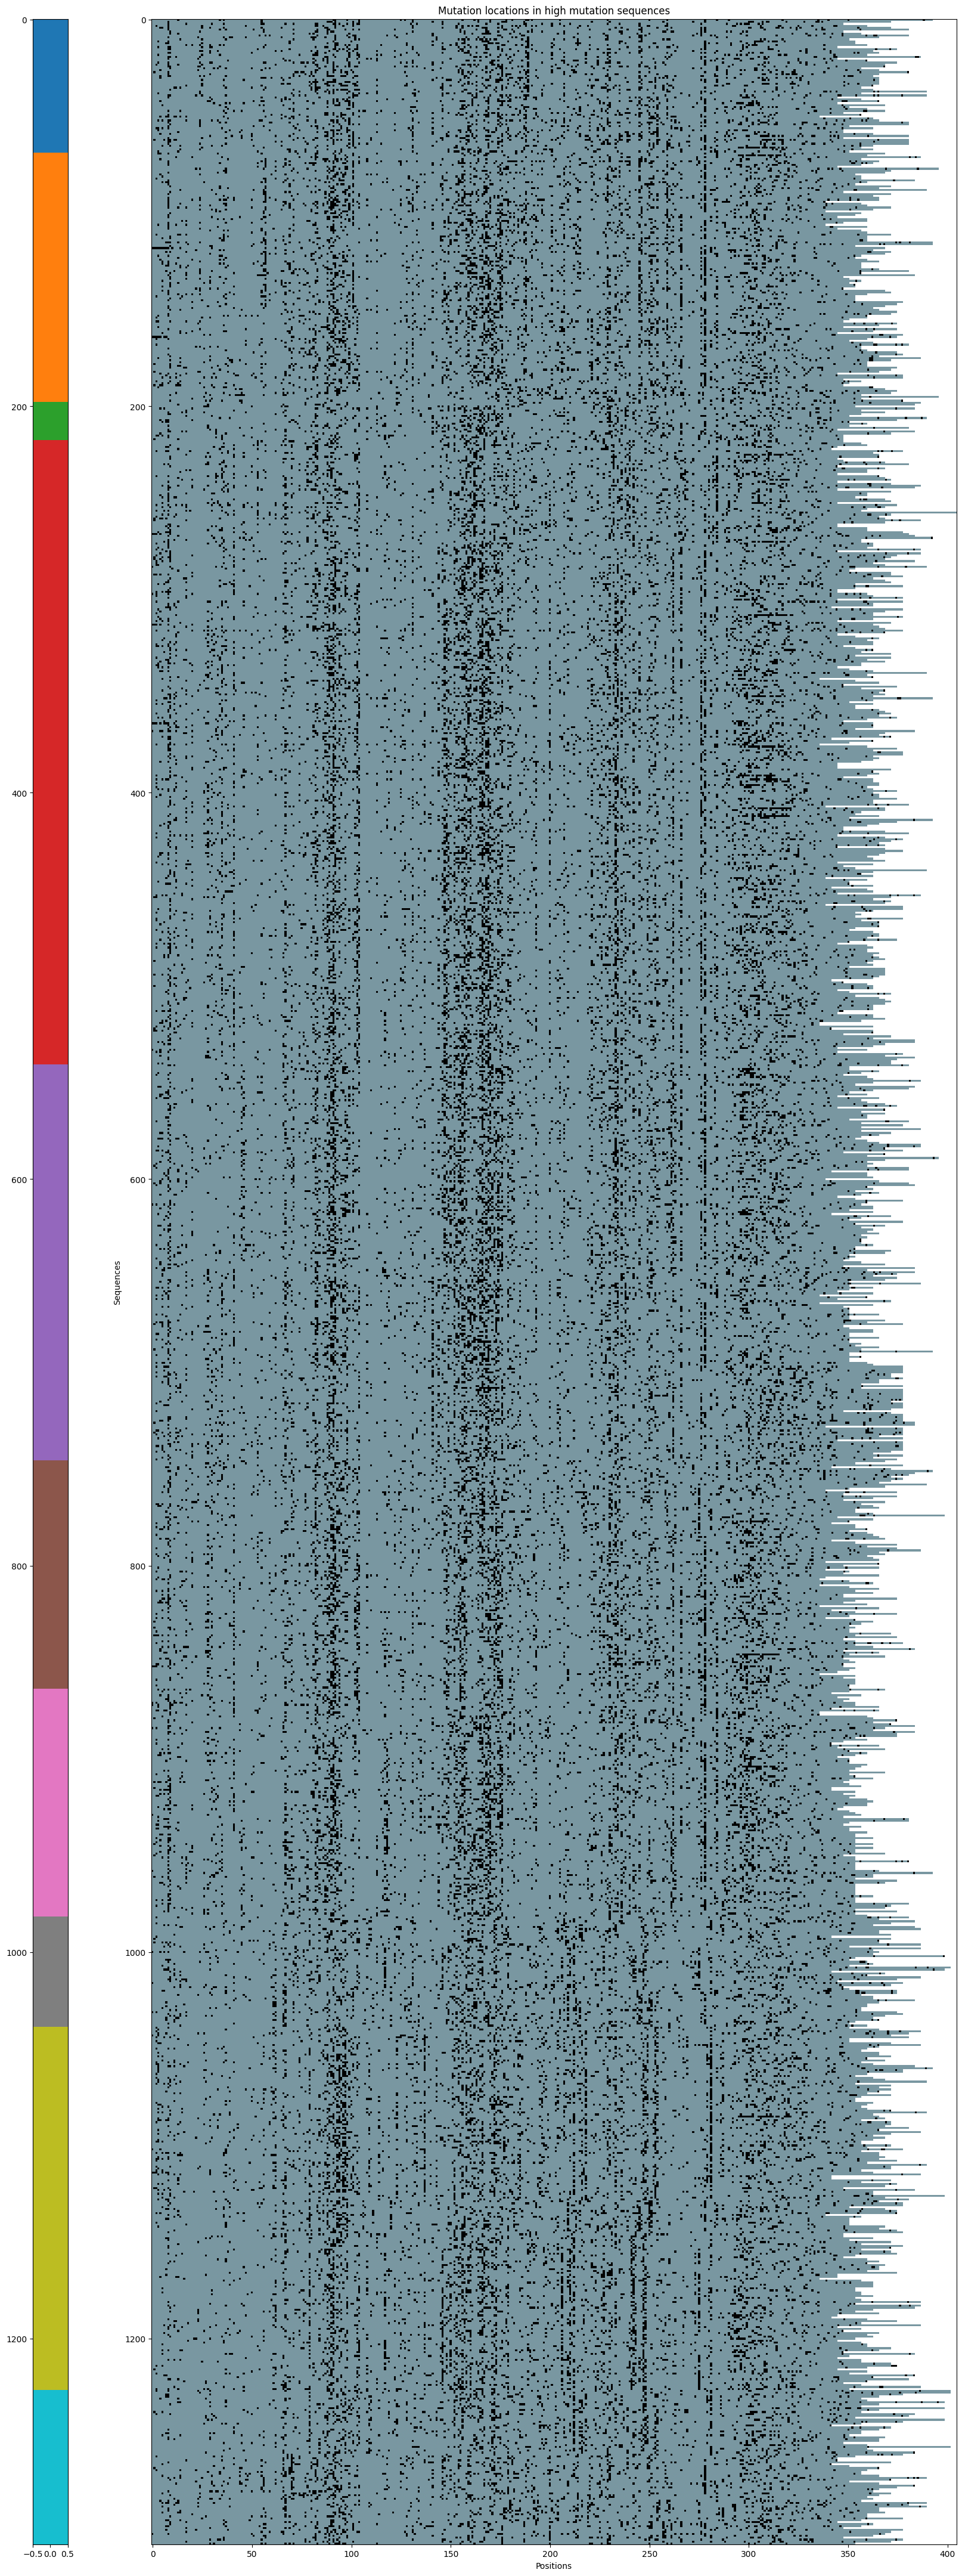

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# Sort by v_gene column
high_mut_df = high_mut_df.sort_values(by='v_gene')

# Find the maximum sequence length
max_len = high_mut_df['nt_mutations'].apply(len).max()

# Initialize a 2D NumPy array with NaNs for mutations
arr = np.full((len(high_mut_df), max_len), np.nan)

# Initialize a 2D NumPy array for v_gene
v_gene_arr = np.zeros((len(high_mut_df), 1))

# Map unique v_gene values to integers for coloring
unique_genes = high_mut_df['v_gene'].unique()
gene_to_int = {gene: i for i, gene in enumerate(unique_genes)}
v_gene_arr[:, 0] = high_mut_df['v_gene'].map(gene_to_int)

# Fill in the values for mutations
for i, row in enumerate(high_mut_df['nt_mutations']):
    arr[i, :len(row)] = row

# Create a 12x12 figure
fig = plt.figure(figsize=(20, 55))

# Define the grid layout
gs = GridSpec(1, 2, width_ratios=[0.5, 11.5])  # 0.5 inch for the first plot, 11.5 inches for the second

# Create the subplots
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

# Plot v_gene information on ax1
ax1.imshow(v_gene_arr, cmap='tab10', aspect='auto')

# Plot mutation information on ax2
cmap = plt.cm.colors.ListedColormap(['lightblue', 'black'])
ax2.imshow(arr, cmap=cmap, aspect='auto')

# Use gray color for NaNs on ax2
ax2.imshow(np.isnan(arr), cmap='gray', alpha=0.3, aspect='auto')

plt.title("Mutation locations in high mutation sequences")
ax2.set_xlabel("Positions")
ax2.set_ylabel("Sequences")
plt.show()


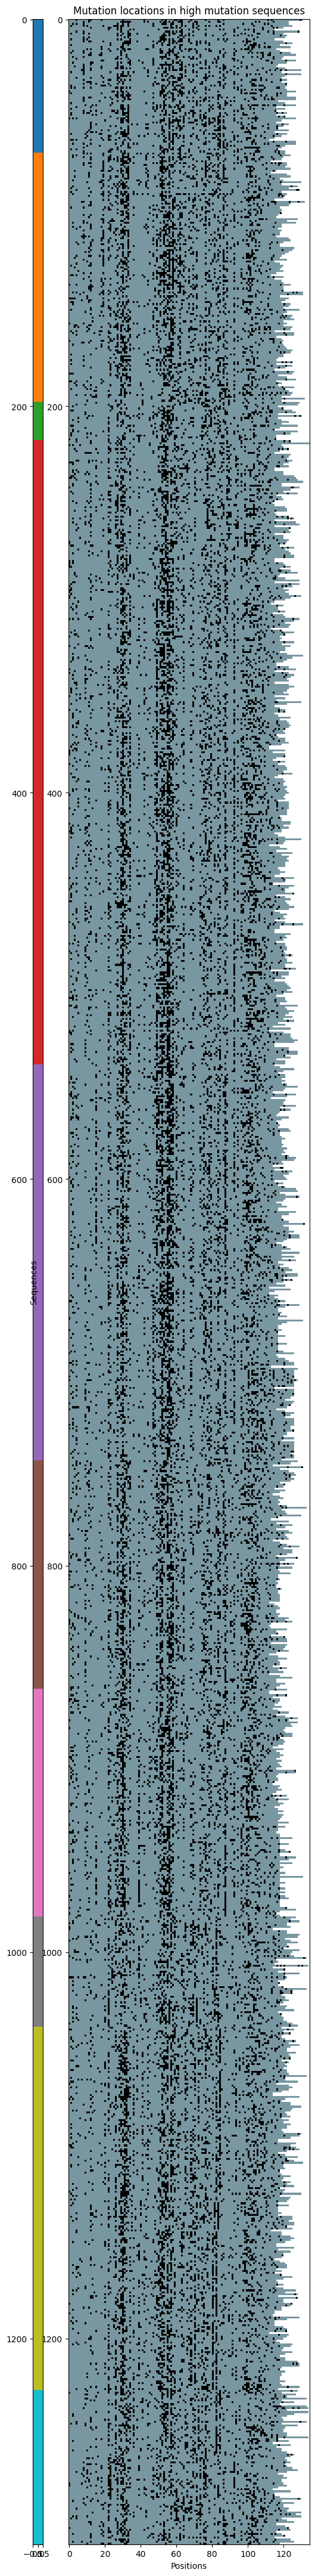

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# Sort by v_gene column
high_mut_df = high_mut_df.sort_values(by='v_gene')

# Find the maximum sequence length
max_len = high_mut_df['aa_mutations'].apply(len).max()

# Initialize a 2D NumPy array with NaNs for mutations
arr = np.full((len(high_mut_df), max_len), np.nan)

# Initialize a 2D NumPy array for v_gene
v_gene_arr = np.zeros((len(high_mut_df), 1))

# Map unique v_gene values to integers for coloring
unique_genes = high_mut_df['v_gene'].unique()
gene_to_int = {gene: i for i, gene in enumerate(unique_genes)}
v_gene_arr[:, 0] = high_mut_df['v_gene'].map(gene_to_int)

# Fill in the values for mutations
for i, row in enumerate(high_mut_df['aa_mutations']):
    arr[i, :len(row)] = row

# Create a 12x12 figure
fig = plt.figure(figsize=(20//3, 55))

# Define the grid layout
gs = GridSpec(1, 2, width_ratios=[0.5, 11.5])  # 0.5 inch for the first plot, 11.5 inches for the second

# Create the subplots
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

# Plot v_gene information on ax1
ax1.imshow(v_gene_arr, cmap='tab10', aspect='auto')

# Plot mutation information on ax2
cmap = plt.cm.colors.ListedColormap(['lightblue', 'black'])
ax2.imshow(arr, cmap=cmap, aspect='auto')

# Use gray color for NaNs on ax2
ax2.imshow(np.isnan(arr), cmap='gray', alpha=0.3, aspect='auto')

plt.title("Mutation locations in high mutation sequences")
ax2.set_xlabel("Positions")
ax2.set_ylabel("Sequences")
plt.show()


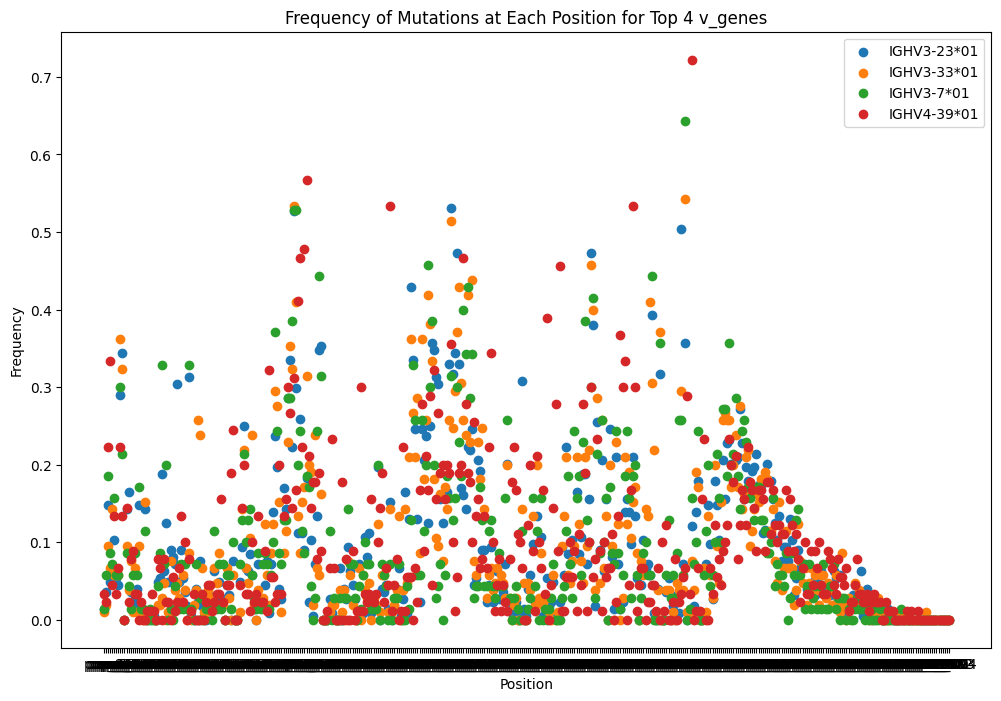

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Determine the maximum sequence length
max_len = high_mut_df['nt_mutations'].apply(len).max()

# 2. Create an empty DataFrame with `v_gene` as index and columns for each position
columns = [f'pos_{i}' for i in range(max_len)]
agg_df = pd.DataFrame(columns=columns)

# Count the frequency of each v_gene
v_gene_counts = high_mut_df['v_gene'].value_counts()

# Keep only the 8 most frequent v_genes
top_v_genes = v_gene_counts.nlargest(4).index

# Filter the DataFrame to include only these
filtered_df = high_mut_df[high_mut_df['v_gene'].isin(top_v_genes)]

# 3. Iterate over each of the most frequent v_genes and fill the DataFrame
for v_gene, group in filtered_df.groupby('v_gene'):
    
    # Initialize a list to hold the sum of `True` values at each position
    sum_at_pos = [0]*max_len
    total_rows = len(group)
    
    # Sum up the `True` values at each position
    for nt_mutations in group['nt_mutations']:
        for i, val in enumerate(nt_mutations):
            sum_at_pos[i] += val
    
    # Calculate the frequency at each position
    freq_at_pos = [x / total_rows for x in sum_at_pos]
    
    # Append this to the DataFrame
    agg_df.loc[v_gene] = freq_at_pos

agg_df.index.name = 'v_gene'

# Plotting
plt.figure(figsize=(12, 8))
for v_gene in agg_df.index:
    plt.scatter(agg_df.columns, agg_df.loc[v_gene], label=v_gene)
    
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.title('Frequency of Mutations at Each Position for Top 4 v_genes')
plt.legend()
plt.show()


In [12]:
high_mut_df["v_gene"].value_counts()

v_gene
IGHV3-23*01          224
IGHV3-33*01          105
IGHV4-39*01           90
IGHV3-7*01            70
IGHV4-59*01           69
IGHV3-15*01           53
IGHV3-48*03           51
IGHV1-46*01           50
IGHV3-74*01           49
IGHV3-9*01            43
IGHV1-69*09           37
IGHV1-3*01            31
IGHV3-48*02           28
IGHV3-21*01           28
IGHV3-53*01           27
IGHV1-18*01           25
IGHV4-34*01           23
IGHV5-51*01           23
IGHV1-2*02            23
IGHV4-61*01           18
IGHV3-23*04           17
IGHV4-4*02            16
IGHV4-61*02           15
IGHV1-18*04           15
IGHV4-38-2*02         14
IGHV3-7*03            14
IGHV3-48*01           14
IGHV4-31*03           14
IGHV7-4-1*02          12
IGHV3-11*01           12
IGHV6-1*01            11
IGHV4-4*07            10
IGHV3-72*01            9
IGHV2-5*02             8
IGHV3-49*03            7
IGHV3-43*01            7
IGHV3-64*05+G240C      5
IGHV4-38-2*01          5
IGHV3-64*01            5
IGHV3-49*04       

In [13]:
agg_df

,pos_0,pos_1,pos_2,pos_3,pos_4,pos_5,pos_6,pos_7,pos_8,pos_9,...,pos_395,pos_396,pos_397,pos_398,pos_399,pos_400,pos_401,pos_402,pos_403,pos_404
v_gene,,,,,,,,,,,,,,,,,,,,,
IGHV3-23*01,0.013393,0.035714,0.147321,0.049107,0.066964,0.102679,0.053571,0.044643,0.290179,0.343750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IGHV3-33*01,0.009524,0.019048,0.095238,0.066667,0.142857,0.057143,0.057143,0.057143,0.361905,0.323810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IGHV3-7*01,0.014286,0.057143,0.185714,0.085714,0.071429,0.157143,0.057143,0.057143,0.300000,0.214286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IGHV4-39*01,0.033333,0.022222,0.222222,0.333333,0.044444,0.133333,0.033333,0.066667,0.222222,0.133333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# find the index of the maximum entry of agg_df["IGHV4-39*01"]
for v_gene in agg_df.index:
    max_pos = agg_df.loc[v_gene].argmax()
    rows_with_v_gene = len(high_mut_df[high_mut_df["v_gene"] == v_gene])
    print(f"for {v_gene} the most mutable site is at {max_pos}; there are {rows_with_v_gene} sequences with that v gene")
    print(high_mut_df[high_mut_df["v_gene"] == v_gene]["child"].apply(lambda x: x[max_pos]).value_counts().to_dict())

for IGHV3-23*01 the most mutable site is at 166; there are 224 sequences with that v gene
{'G': 83, 'A': 77, 'C': 47, 'T': 17}
for IGHV3-33*01 the most mutable site is at 278; there are 105 sequences with that v gene
{'G': 42, 'C': 29, 'T': 19, 'A': 15}
for IGHV3-7*01 the most mutable site is at 278; there are 70 sequences with that v gene
{'C': 24, 'G': 22, 'A': 17, 'T': 7}
for IGHV4-39*01 the most mutable site is at 281; there are 90 sequences with that v gene
{'C': 30, 'A': 21, 'T': 20, 'G': 19}


In [15]:
# print the parent sequence as it first appears in the dataframe for each of the v genes in agg_df.index
for v_gene in agg_df.index:
    print(v_gene, "\t", high_mut_df[high_mut_df["v_gene"] == v_gene]["parent"].iloc[0])

IGHV3-23*01 	 GAGGTGCAGTTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCCGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTTAGCAGTTATGCCATGAACTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAACTATGAGTGGTAGTGGAGATAACACATCCTACGCAGACTCCGTGAAGGGCCGGTTCTCCATCTCCAGAGACAATTCCAAGAACACGGTGTTTCTGCAAATGAACAGCCTGCGAGCCGACGACACGGCCGTTTATTACTGTGCGAGAGGCCGCATAGTGGGAGCTACTTTCTACTTCGACCCCTGGGGCCAGGGAACCCTGGTCACCGTCTCCTCA
IGHV3-33*01 	 CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGAGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTCAGTAGCTATGGCATGCACTGGGTCCGCCAGGCTCCAGGCAAGGGGCTGGAGTGGGTGGCAGTTATATCATATGATGGAAGTAATAAATACTATGCAGACTCCGTGAAGGGCCGATTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCTGAGGACACGGCTGTGTATTACTGTGCGAAAGATGACTACGGTGACTACTGGGGCCAGGGAACCCTGGTCACCGTCTCCTCA
IGHV3-7*01 	 GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCGGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTTAGTAGCTATTGGATGACCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTGGCCAACATAAAGGAAGATGGAAGTGAGAAATACTATGTGGACTCTGTGAAGGGCCGATTCACCATCTCCAGAGACAACGCCAAGAACTCAATGTATCTGCAAATG